<a href="https://colab.research.google.com/github/madeleinegrc/Projects/blob/main/Batting_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regression Supervised Learning with SF Giants Batting Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import sklearn
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')
batting = pd.read_csv('drive/My Drive/SFG_batting.csv')
#dataset url: https://www.kaggle.com/datasets/mattop/san-francisco-giants-batting-and-pitching-data

batting.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Rank,Year,Position,Name,Age,Games,Plate_Appearances,At_Bats,Runs,Hits,...,On_Base_Plus_Slugging_Percentage,On_Base_Plus_Slugging_Percentage_Plus,Total_Bases,Double_Plays_Grounded_Into,Times_Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flies,Intentional_Bases_on_Balls,Dominant_Hand,Switch_Hitter
0,1,2023,C,Patrick Bailey,24,97,353,326,29,76,...,0.644,77,117,8,3,2,1,0,Right,Yes
1,2,2023,1B,LaMonte Wade Jr.,29,135,519,429,64,110,...,0.790,119,179,4,6,4,4,3,Left,No
2,3,2023,2B,Thairo Estrada,27,120,530,495,63,134,...,0.731,101,206,10,11,0,2,1,Right,No
3,4,2023,SS,Brandon Crawford,36,93,320,283,31,55,...,0.587,63,89,5,4,1,4,1,Left,No
4,5,2023,3B,J.D. Davis,30,144,546,480,61,119,...,0.738,103,198,16,6,0,6,0,Right,No


0.012106101655048773 [1.06304298]


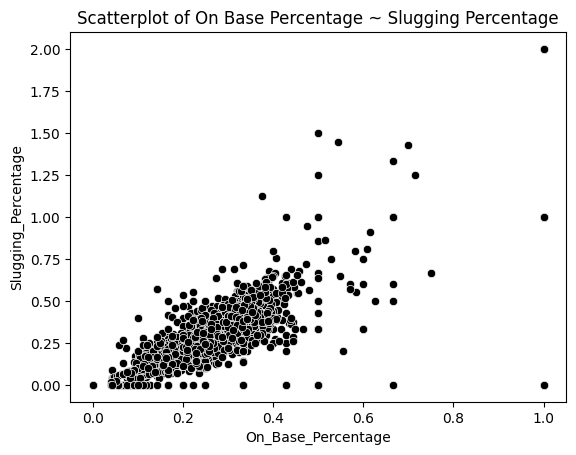

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

sns.scatterplot(data = batting, x = "On_Base_Percentage", y = "Slugging_Percentage", color = "black")
plt.title('Scatterplot of On Base Percentage ~ Slugging Percentage')

model1 = linear_model.LinearRegression()
model1.fit(X = pd.DataFrame(batting["On_Base_Percentage"]), y = batting["Slugging_Percentage"])
print(model1.intercept_, model1.coef_)
train_prediction = model1.predict(X = pd.DataFrame(batting["On_Base_Percentage"]))



We are trying to predict the slugging percentage of a given player based on their on base percentage.

Text(0.5, 0, 'On Base Percentage')

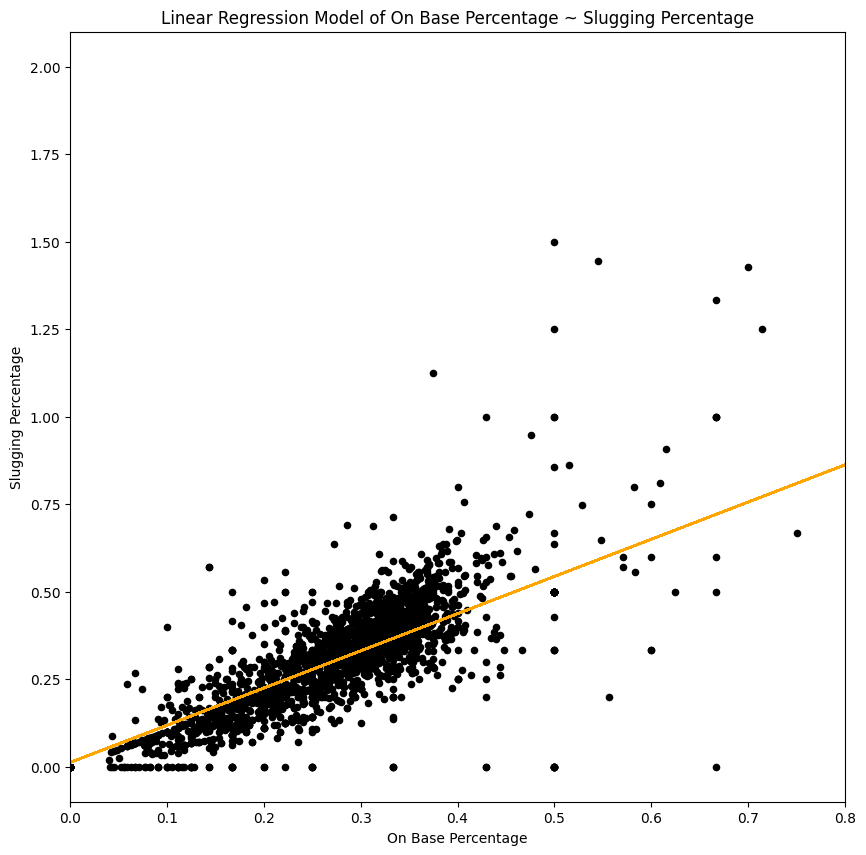

In [ ]:
batting.plot(kind = "scatter", x = "On_Base_Percentage", y = "Slugging_Percentage", figsize = (10,10), color = "black", xlim = (0,0.8))
plt.plot(batting["On_Base_Percentage"], train_prediction, color = "orange")
plt.title('Linear Regression Model of On Base Percentage ~ Slugging Percentage')
plt.ylabel('Slugging Percentage')
plt.xlabel('On Base Percentage')


The model's intercept and coefficient show a best fit line with the equation slugging percentage = 0.012106101655048773 - 1.06304298 * on base percentage.

In [ ]:
model1.score(X = pd.DataFrame(batting["On_Base_Percentage"]), y = batting["Slugging_Percentage"])

0.700472088095623

The coefficient of determination (r^2) shows that approximately 70% of the variance in slugging percentage can be explained by the on base percentage. In other words, this shows goodness of fit.

In [ ]:
residuals = batting["Slugging_Percentage"] - train_prediction
residuals.describe()

,Slugging_Percentage
count,2.722000e+03
mean,-7.178518e-18
std,1.131004e-01
min,-1.075149e+00
25%,-3.020322e-02
50%,-1.210610e-02
75%,3.898100e-02
max,9.563724e-01


Text(0.5, 1.0, 'Residuals of On Base Percentage ~ Slugging Percentage')

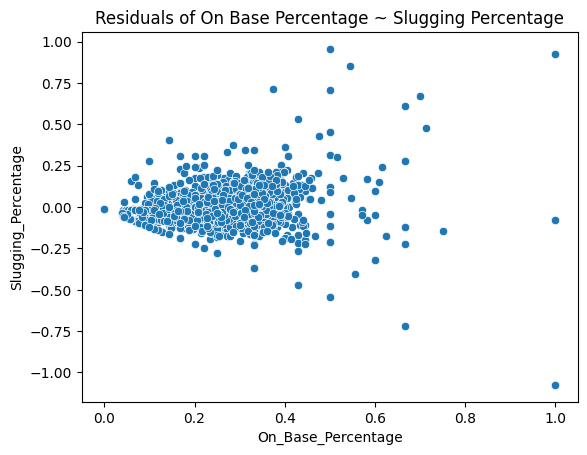

In [ ]:
sns.scatterplot(data = batting, x = "On_Base_Percentage", y = residuals)
plt.title('Residuals of On Base Percentage ~ Slugging Percentage')

Our residuals seem to be centered around 0; however, there is not a random scatter.

((array([-3.4758549 , -3.23042631, -3.09461082, ...,  3.09461082,
          3.23042631,  3.4758549 ]),
  array([-1.07514908, -1.07514908, -1.07514908, ...,  0.92485092,
          0.92485092,  0.95637241])),
 (0.09477462572580853, -1.583339822926802e-17, 0.8371609738236335))

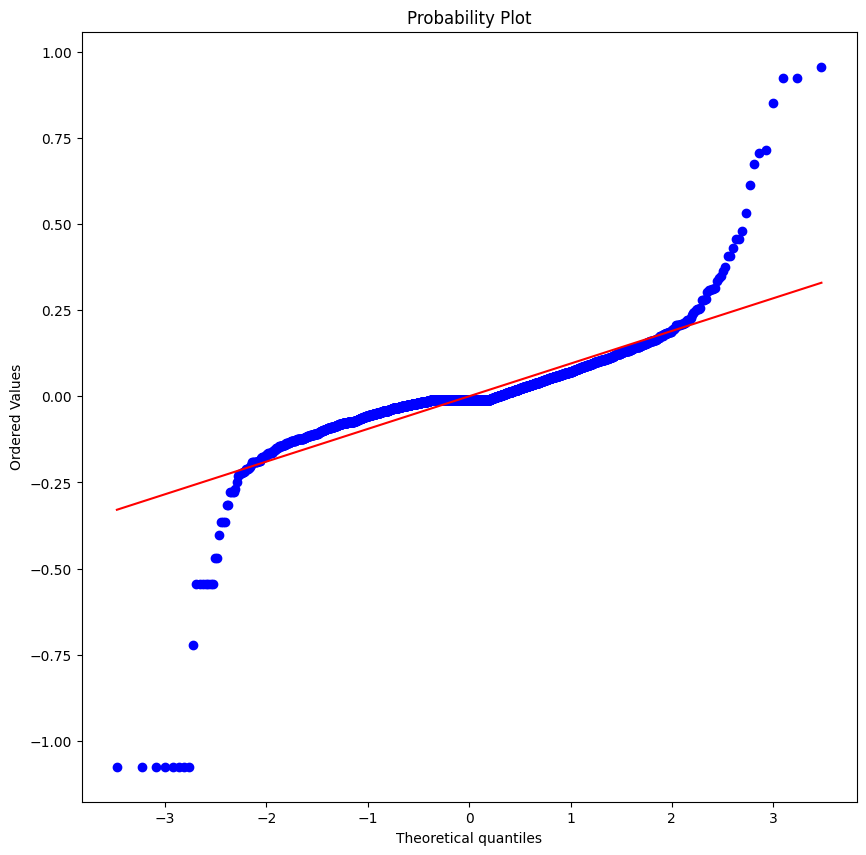

In [ ]:
plt.figure(figsize = (10,10))
stats.probplot(residuals, dist = "norm", plot = plt)

We can see that our residuals here are very non-linear, skewing both at the top and the bottom.

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(train_prediction, batting["Slugging_Percentage"] ** 0.5)
print(RMSE)

0.053893968178210815


The root mean squared error is approximately 0.054, which is fairly good since it is approaching 0. We can try polynomial regression to see if that might be a better fit.

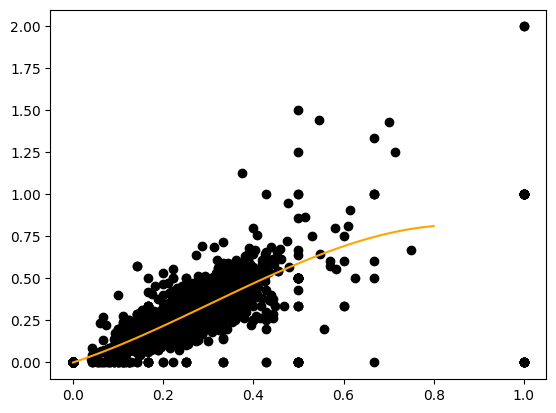

In [ ]:
polymodel = np.poly1d(np.polyfit(batting["On_Base_Percentage"], batting["Slugging_Percentage"], 3))
line = np.linspace(0, 0.8, 100)
plt.scatter(batting["On_Base_Percentage"], batting["Slugging_Percentage"], color = "black")
plt.plot(line, polymodel(line), color = "orange")
plt.show()

Our polynomial regression line is actually fairly linear.

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(batting["Slugging_Percentage"], polymodel(batting["On_Base_Percentage"]))
print(r2)

0.7287865801527494


Our coefficient of determination is a little better which is promising.

In [ ]:
train_prediction2 = polymodel(batting["On_Base_Percentage"])
residuals2 = batting["Slugging_Percentage"] - train_prediction2
residuals.describe()

,Slugging_Percentage
count,2.722000e+03
mean,-7.178518e-18
std,1.131004e-01
min,-1.075149e+00
25%,-3.020322e-02
50%,-1.210610e-02
75%,3.898100e-02
max,9.563724e-01


Text(0.5, 1.0, 'Residuals of On Base Percentage ~ Slugging Percentage')

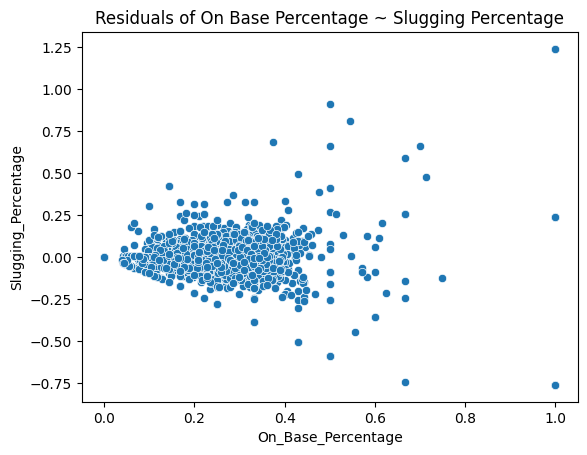

In [ ]:
sns.scatterplot(data = batting, x = "On_Base_Percentage", y = residuals2)
plt.title('Residuals of On Base Percentage ~ Slugging Percentage')